In [54]:
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

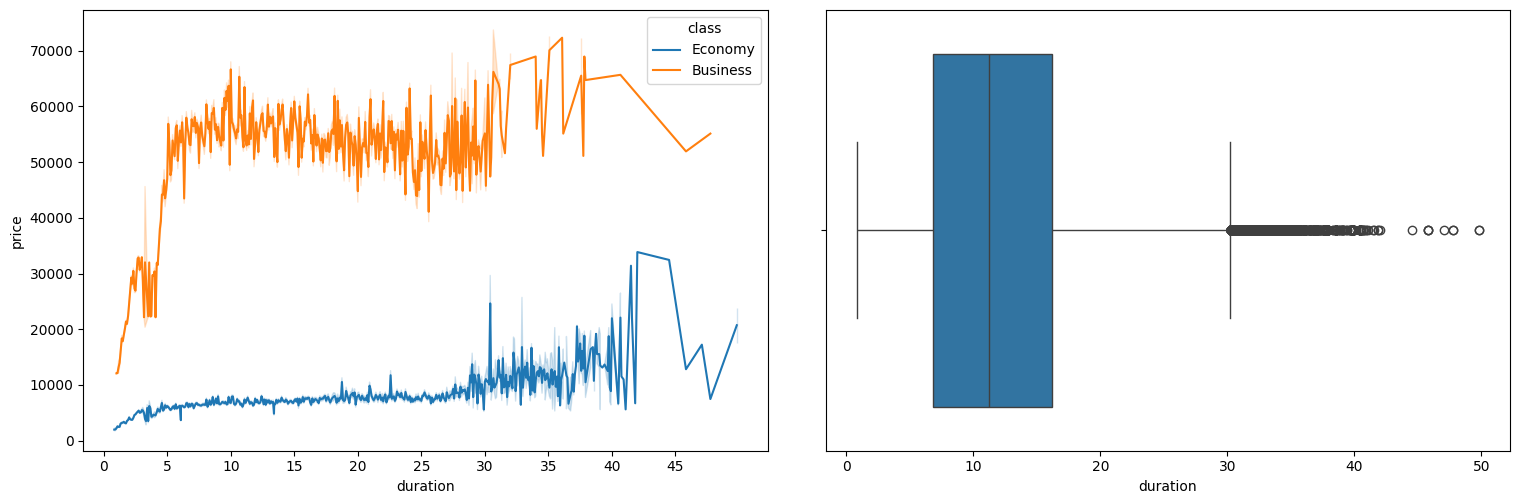

In [55]:
df = pandas.read_csv('Clean_Dataset.csv')

# Drop useless columns
columns_to_drop = ['Unnamed: 0', 'flight']
df = df.drop(columns=columns_to_drop)

# Plot price and duration
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
sns.lineplot(x='duration', y='price', data=df, ax=ax[0], hue='class').set_xticks(np.arange(0, 50, 5))
sns.boxplot(data=df, x='duration', ax=ax[1])
plt.show()


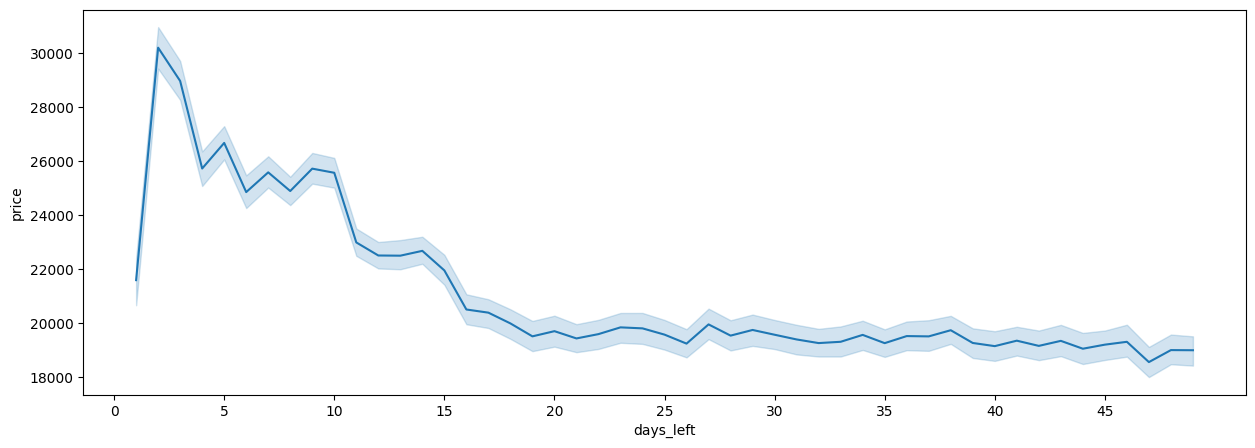

In [46]:
# Price depending on days left
plt.figure(figsize=(15, 5))
sns.lineplot(x='days_left', y='price', data=df).set_xticks(np.arange(0, 50, 5))
plt.show()

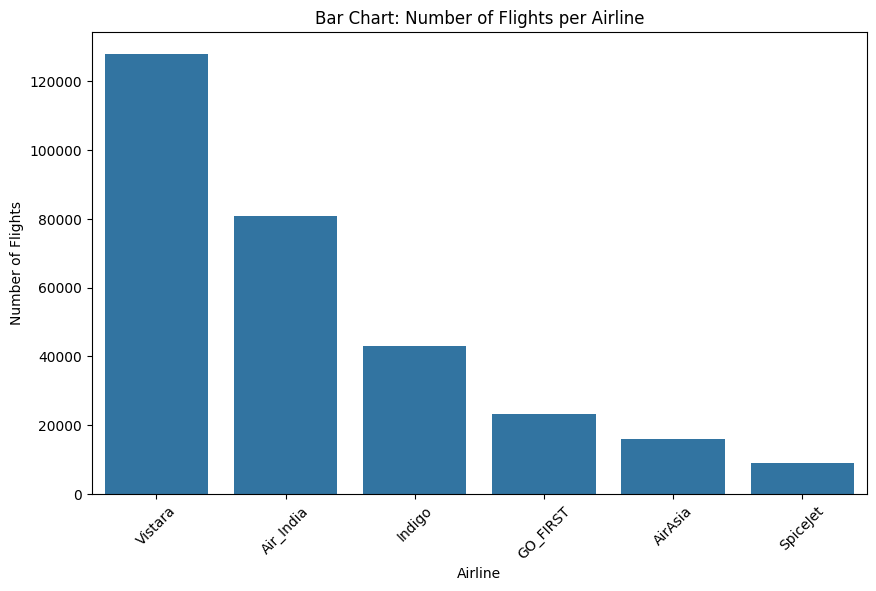

In [48]:
# Number of flights per airline
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline', order=df['airline'].value_counts().index)
plt.title('Bar Chart: Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)  # Rotate the x-axis labels if they overlap
plt.show()

In [49]:
# Label encoding for class column
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# One-hot encoding
columns_to_onehot = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops']

ohe = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded = ohe.fit_transform(df[columns_to_onehot])

df_encoded = pandas.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(columns_to_onehot))
df = pandas.concat([df.drop(columns=columns_to_onehot), df_encoded], axis=1)
# print(df)

In [50]:
def get_outlier_indices(df, features):
    outlier_indices = []

    for c in features:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return outlier_indices

def remove_outliers(df, features):
    outlier_indices = get_outlier_indices(df, features)
    df_cleaned = df.drop(outlier_indices)
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

In [51]:
df = remove_outliers(df, ['duration', 'price'])

In [52]:
X = df.drop(columns='price')
y = df.price

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Linear regression

In [36]:
lr = LinearRegression().fit(X, y)
y_pred_lr = lr.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred_lr)
rmse = math.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred_lr)
print("MSE: " + str(mse))
print("RMSE: " + str(rmse))
print("MAE: " + str(mae))

MSE: 44809694.61106911
RMSE: 6694.004377879441
MAE: 4558.017302847958
